In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import pandas as _pd
import glob as _gl
import pymad8 as _m8
import pybdsim as _bd
import beamTracking
import beamWire
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.29/01


In [2]:
date = "2023_05_15"
save_name_prefix = "plots/BeamWire/" + date + "_T20_plot"

In [3]:
#beamWire.analyticConvolution()

In [4]:
paramdict = {'x' : {'mean': 0, 'std': 10e-6}, #10e-6
             'xp': {'mean': 0, 'std': 10e-6}, #10e-6
             'y' : {'mean': 0, 'std': 10e-6}, #10e-6
             'yp': {'mean': 0, 'std': 10e-6}, #10e-6
             'z' : {'mean': 0, 'std': 30e-6}, #30e-6
             'DE': {'mean': 0, 'std': 3e-3},  #3e-3
            }

In [5]:
npart = 20000
T_C = _m8.Sim.Track_Collection(14)
T_C.GenerateNtracks(npart, paramdict)
T_C.WriteBdsimTrack('../03_bdsimModel/track_input_bdsim_wire')

In [6]:
#beamWire.runOneOffset("../03_bdsimModel/T20_for_wire.gmad", npart=npart, diameter=0.5, offsetX=0.1)

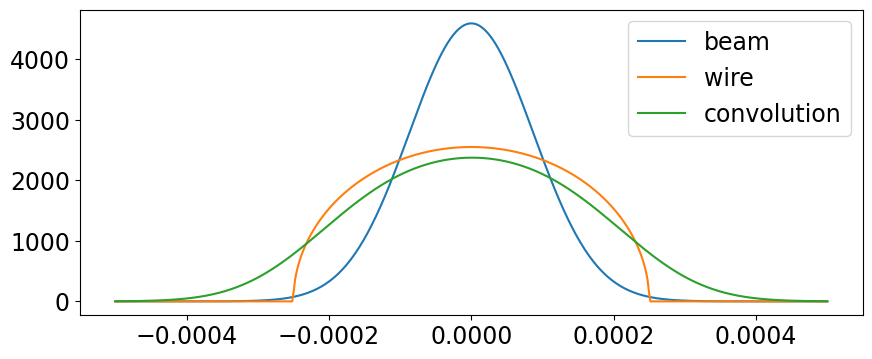

In [7]:
beamWire.PlotConvolutionExample()
_plt.savefig("{}_convolution_example".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

In [20]:
beamWire.runScanOffset('../03_bdsimModel/T20_for_wire.gmad', npart=npart, diameter=0.5, offsetXmin=-0.5, offsetXmax=0.5, nbpts=21)

KeyboardInterrupt: 

In [51]:
beamWire.analysis(_gl.glob("../04_dataLocal/T20_for_wire_*.root"))

BDSIM output file - using DataLoader
File : ../04_dataLocal/T20_for_wire_0.0.root  / Nb of entries =  20000
BDSIM output file - using DataLoader
File : ../04_dataLocal/T20_for_wire_-0.1.root  / Nb of entries =  20000
BDSIM output file - using DataLoader
File : ../04_dataLocal/T20_for_wire_0.1.root  / Nb of entries =  20000
BDSIM output file - using DataLoader
File : ../04_dataLocal/T20_for_wire_0.15.root  / Nb of entries =  20000
BDSIM output file - using DataLoader
File : ../04_dataLocal/T20_for_wire_-0.3.root  / Nb of entries =  20000
BDSIM output file - using DataLoader
File : ../04_dataLocal/T20_for_wire_0.35.root  / Nb of entries =  20000
BDSIM output file - using DataLoader
File : ../04_dataLocal/T20_for_wire_0.2.root  / Nb of entries =  20000
BDSIM output file - using DataLoader
File : ../04_dataLocal/T20_for_wire_-0.45.root  / Nb of entries =  20000
BDSIM output file - using DataLoader
File : ../04_dataLocal/T20_for_wire_-0.05.root  / Nb of entries =  20000
BDSIM output file - 

0

In [18]:
OFFSETS, NPHOTONS, ERRORS = beamWire.countPhotonsInHistAllFiles('T20_for_wire', 'PHOTONS_R_cut')

REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile


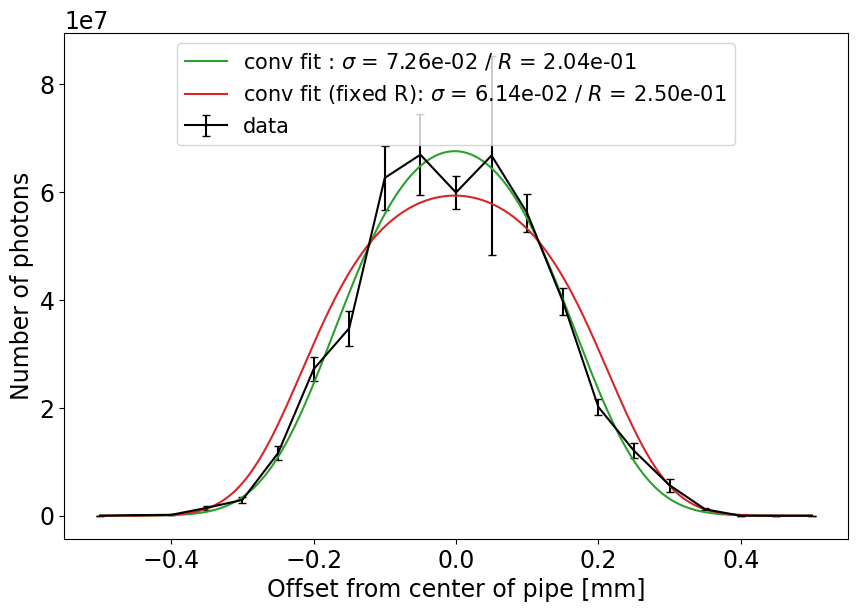

In [19]:
beamWire.PlotConvolution(OFFSETS, NPHOTONS, ERRORS)
_plt.savefig("{}_photon_beam_scan_and_convolution_fit".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

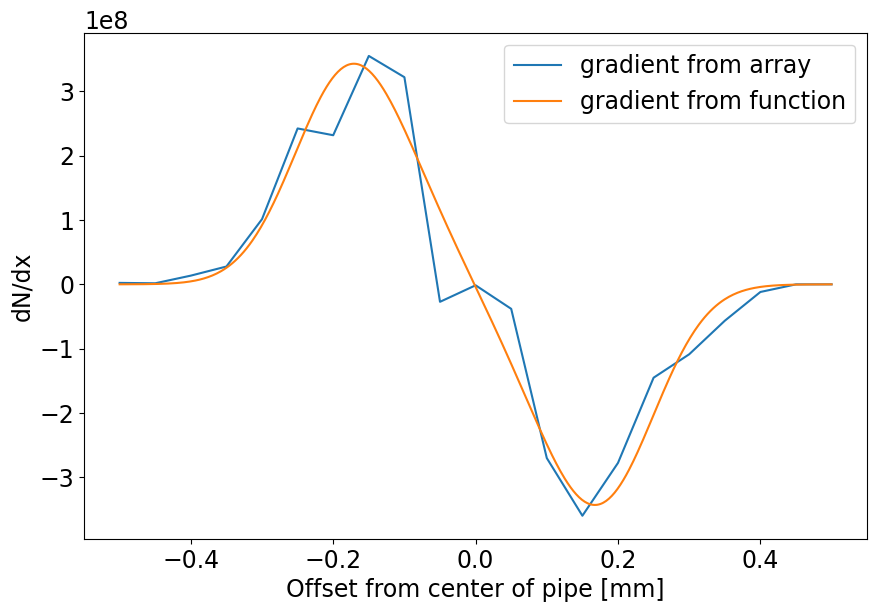

In [22]:
_plt.rcParams['font.size'] = 17
fig, ax = _plt.subplots(1,1,figsize=(9,6))
fig.tight_layout()
_plt.plot(OFFSETS, _np.gradient(NPHOTONS, OFFSETS), label='gradient from array')
popt, pcov = curve_fit(beamWire.func_conv, OFFSETS, NPHOTONS, p0=[3e9, 50e-3, 0, 250e-3])
X = _np.linspace(-0.5, 0.5, 500)
_plt.plot(X, _np.gradient(beamWire.func_conv(X, A=popt[0], sigma=popt[1], mu=popt[2], R=popt[3]), X), label='gradient from function')

_plt.xlabel('Offset from center of pipe [mm]')
_plt.ylabel('dN/dx')
_plt.legend()

_plt.savefig("{}_derivative_of_photon_beam_profile".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

REBDSIM analysis file - using RebdsimFile


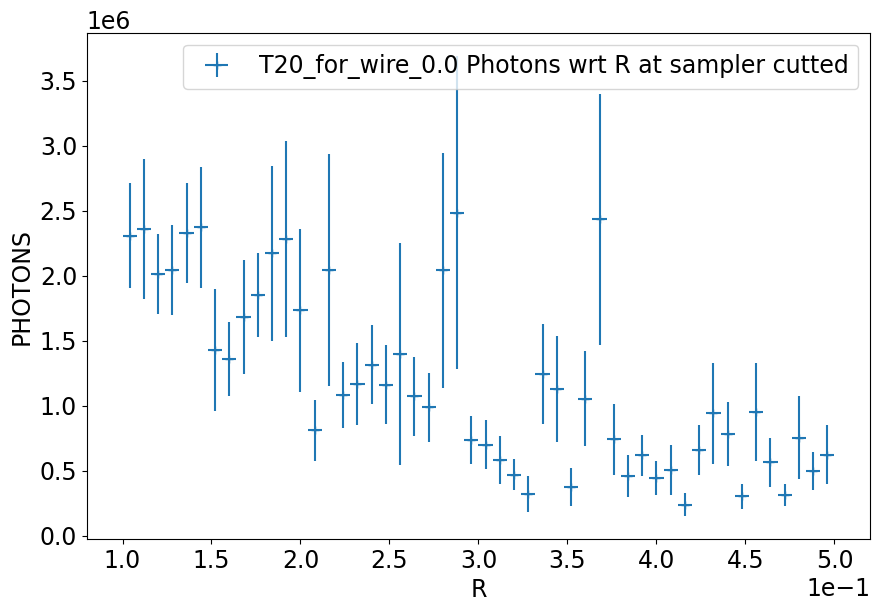

In [23]:
beamWire.plot_hist("../06_analysis/T20_for_wire_0.0_hist.root", "PHOTONS_R_cut", steps=False, errorbars=True)
_plt.ticklabel_format(axis='both', style='sci', scilimits=(1,6))
_plt.savefig("{}_photon_beam_X_profile".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

In [25]:
import ROOT as _rt
inputfilename = "../06_analysis/T20_for_wire_0.0_hist.root"
histname = "PHOTONS_R_cut"

f = _rt.TFile(inputfilename)
test_bd_load = _bd.Data.Load(inputfilename)
npart = test_bd_load.header.nOriginalEvents
root_hist = f.Get("Event/MergedHistograms/"+histname)
python_hist = _bd.Data.TH1(root_hist)

REBDSIM analysis file - using RebdsimFile


In [52]:
python_hist.entries
npart

20000

In [28]:
sum(python_hist.contents)

59949953.38044314

In [29]:
sum(python_hist.errors)

18186278.631180674

In [33]:
_np.sqrt(sum(python_hist.errors**2))

3120322.442216932

In [49]:
_bd.Run.RebdsimCombine("../06_analysis/T20_for_wire_merged.root", "../06_analysis/T20_for_wire_*_hist.root")

1

Glob with * did not match any files
